# TD 7 : Révisions

Christelle Gonindard, Matthais Grenié, François Bettega

<div class="alert alert-info">

## Objectifs

- Reprendre l'intégralité des notions statistiques vues ce semestre
- S'entraîner à mettre en place des tests statistiques
- Pratiquer la programmation avec R et la manipulation de données

</div>

Attention, pour chaque test il faut :

1. Présenter les données,
2. Définir le ou les tests que vous allez effectuer,
3. Définir les hypothèses du ou des tests,
4. Rappeler et vérifier les conditions d'application du ou test,
5. Réaliser le test,
6. Interpréter la p-value,
7. Conclure sur les données. 

## 1. Présentation des données


Le fichier `credit_approval.txt` dans le dossier `data/` décrit 50 ménages, formés de couples mariés hétérosexuels, tous deux actifs, qui ont déposé une demande de crédit auprès d’un établissement bancaire. Les variables disponibles sont les suivantes :

- `sal.homme` : logarithme du salaire de l’homme,
- `sal.femme` : logarithme du salaire de la femme,
- `rev.tete` : logarithme du revenu par tête c'est‐à‐dire total des revenus divisé par le nombre de personnes,
- `age` : logarithme de l’âge de l’homme,
- `acceptation` : accord du crédit par l’organisme prêteur (valeurs : `"oui"` ou `"non"`),
- `garantie.supp`: garantie supplémentaire demandée par l’organisme prêteur (valeurs : `"caution"`, `"hypotheque"` ou `"non"`),
- `emploi` : type d’emploi occupé par la personne de référence lors de la demande de crédit (valeurs : `"cdd"` ou `"cdi"`).

Les variables quantitatives sont toutes potentiellement « variable d’intérêt » ; les variables catégorielles vont servir à définir les sous-populations à étudier.

## 2. Description des données

Décrivez les données de manière générales. N'oubliez pas de les visualiser !

,sal.homme,sal.femme,rev.tete,age,acceptation,garantie.supp,emploi
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,7.92,7.72,7.42,3.69,oui,hypotheque,cdd
2,7.97,7.49,7.76,3.89,oui,caution,cdd
3,6.97,7.10,6.35,3.53,non,non,cdd
4,7.85,7.39,7.24,3.78,oui,caution,cdd
5,6.67,6.76,5.46,3.78,oui,hypotheque,cdd
6,6.89,6.51,6.72,4.16,non,hypotheque,cdd


   sal.homme       sal.femme        rev.tete          age       
 Min.   :6.020   Min.   :6.030   Min.   :5.110   Min.   :3.090  
 1st Qu.:7.263   1st Qu.:6.990   1st Qu.:6.452   1st Qu.:3.478  
 Median :7.465   Median :7.250   Median :7.015   Median :3.740  
 Mean   :7.464   Mean   :7.309   Mean   :6.973   Mean   :3.691  
 3rd Qu.:7.822   3rd Qu.:7.665   3rd Qu.:7.415   3rd Qu.:3.825  
 Max.   :8.780   Max.   :8.580   Max.   :8.690   Max.   :4.160  
 acceptation        garantie.supp         emploi         
 Length:50          Length:50          Length:50         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

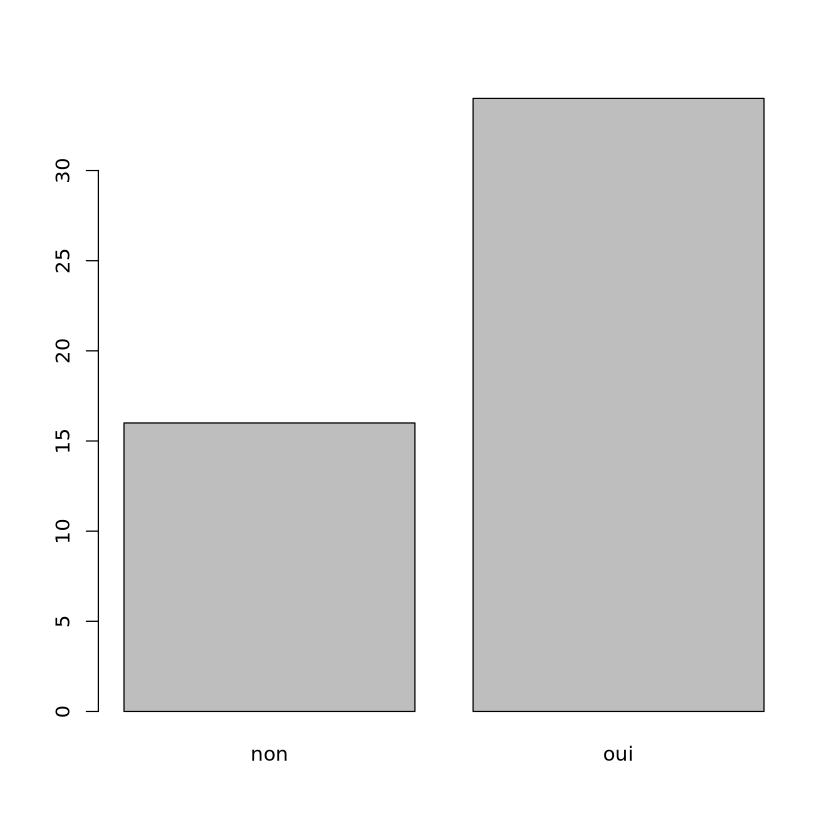

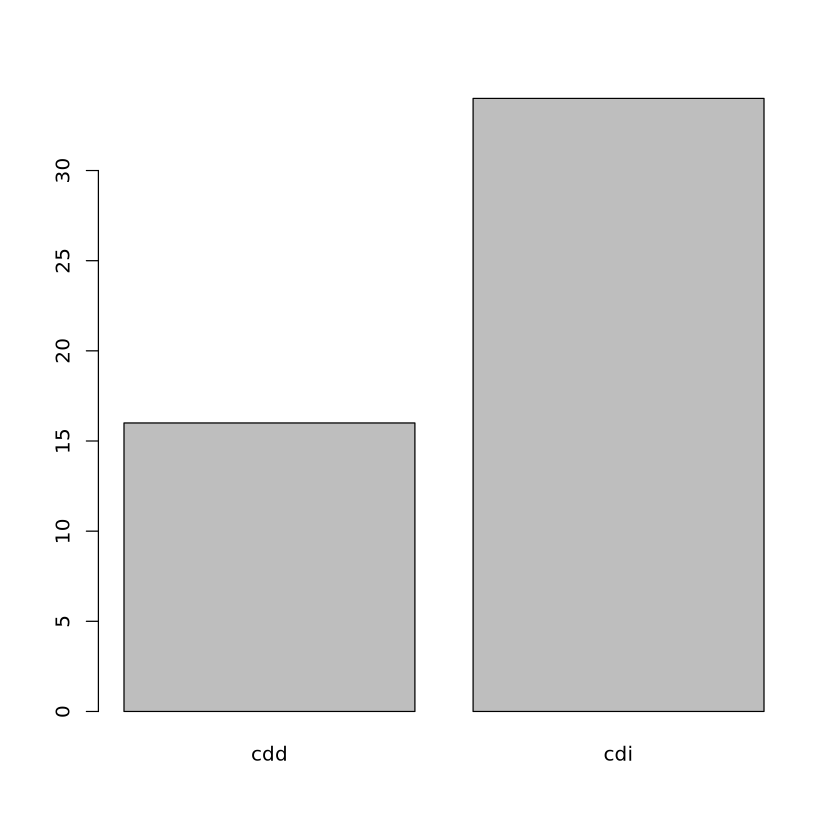

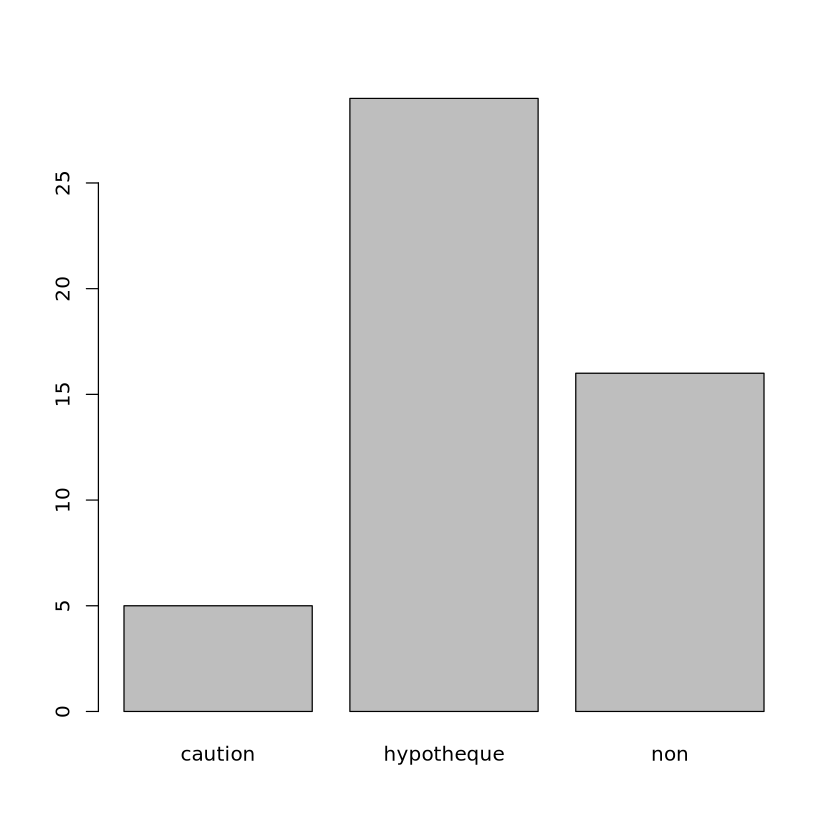

In [15]:
credit_approval = read.table("data/credit_approval.txt" , header=T)
head(credit_approval)
summary (credit_approval)
barplot(table(credit_approval$acceptation))
barplot(table(credit_approval$emploi))
barplot(table(credit_approval$garantie.supp))


## 3. Questions de statistiques descriptives


Répondez aux questions suivantes

1. Calculer le salaire médian des hommes qui en CDI.


In [7]:
sal_h_cdi = credit_approval$sal.homme[credit_aproval$emploi == "cdi"]
median(sal_h_cdi)

[1] 7.48

2. Calculer la variance et l'écart-type de l'âge des hommes dont le couple a eu un prêt d'accepté.



In [8]:
age_h_oui = credit_approval$age[credit_approval$emploi == "oui"]

3. Construire un nouveau tableau ne contenant pas les valeurs inférieures au premier quartile de l'âge de l'homme.

In [9]:
quantile(credit_approval$age , 0.25)

25% 
3.4775

4. Calculer l'écart interquartile (Q3-Q1) du salaire des femmes qui sont en CDI.



In [ ]:
sal_f_cdi = credit_approval$sal.femme[credit_approval$emploi == "cdi"]
Q3 = quantile (sal_f_cdi , 0.25)
Q3
Q1= quantile (sal_f_cdi, 0.25)
Q1


5. Calculer l'intervalle de confiance du salaire des femmes au seuil 98%.


## 4. Questions de statistiques inférentielles

1. Est ce que les femmes en CDI ont un salaire plus élevé que les femmes en CDD ?


2. Nous souhaitons savoir si, dans un ménage, l’homme a tendance à avoir un salaire plus élevé que sa femme au seuil 1%.


*Note (qui ne serait pas présente un jour de contrôle😉) : Il ne faut surtout pas mettre en oeuvre un test pour échantillons indépendants c'est-à-dire comparer la moyenne du
salaire des hommes avec la moyenne de celui des femmes. En effet, la confrontation doit se faire **à l’intérieur
des ménages**. Nous sommes dans un schéma de test pour échantillons appariés.*


## 5. Questions supplémentaires

1. Comparer l’âge de l’homme dans le ménage selon l’acceptation ou non du crédit au seuil 5%.

2. Est ce que les hommes en CDI ont un salaire plus élevé que les hommes en CDD ?


3. Est ce que les femmes en CDD et dont le crédit a été refusé ont un salaire plus faible que les femmes en CDD et dont le crédit leur a été accepté au seuil 5%?


4. Est-ce que les Hommes en CDD et dont le crédit a été refusé ont un salaire plus faible que les Hommes en CDD et dont le crédit a été accepté au seuil 5% ?
